In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastcore import *
from pathlib2 import Path
import json
import pandas as pd
import coco_text
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
Path().absolute()

PosixPath('/home/fredrikmathisen/Documents/text_detection')

In [4]:
#path_coco = Path('/home/paperspace/data/coco')
path_coco = Path('/home/fredrikmathisen/Documents/data/coco')

In [5]:
#Paperspace path
#img_dir = Path('/home/paperspace/data/coco/images/train2014/')
#annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

#Local path mmiv
img_dir = path_coco/'images/train2014/'
annotations = path_coco/'annotations/COCO_Text.json'


In [6]:
annotations

PosixPath('/home/fredrikmathisen/Documents/data/coco/annotations/COCO_Text.json')

In [7]:
ct_anno = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:01.703474
creating index...
index created!


In [8]:
ct_anno.info()

url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [9]:
imgs = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible'),('class','machine printed')])

In [10]:
anns = ct_anno.getAnnIds(imgIds=ct_anno.train, 
                        catIds=[('legibility','legible'),('class','machine printed')])

In [11]:
# get all images containing at least one instance of legible text
imgIds = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible')])
# pick one at random
img = ct_anno.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000100901.jpg


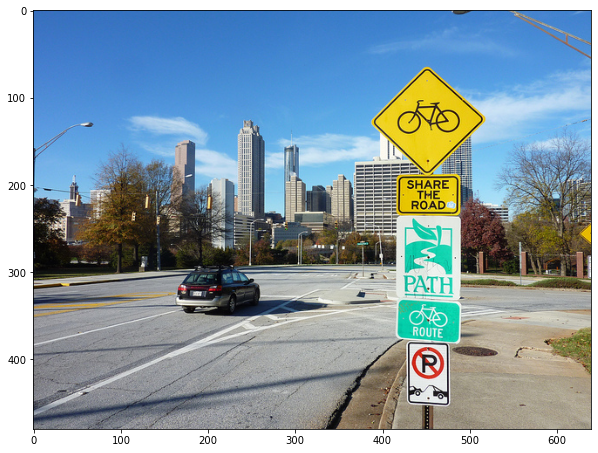

In [12]:
dataType = 'train2014'


I = io.imread('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
print('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

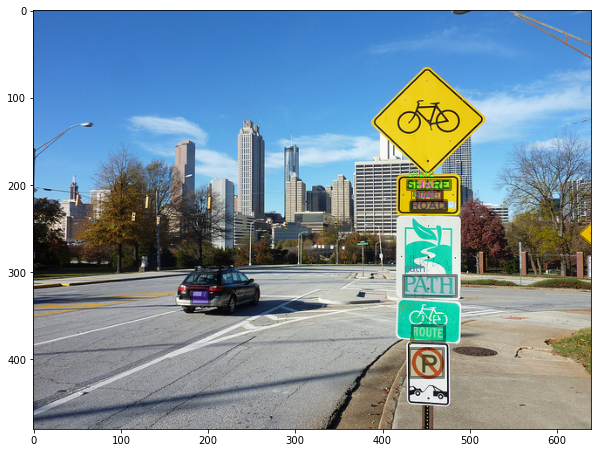

In [13]:
plt.imshow(I)
annIds = ct_anno.getAnnIds(imgIds=img['id'])
anns = ct_anno.loadAnns(annIds)
ct_anno.showAnns(anns)

In [14]:
img

{'width': 640,
 'file_name': 'COCO_train2014_000000100901.jpg',
 'set': 'train',
 'id': 100901,
 'height': 480}

In [15]:
anns

[{'polygon': [431.14405822753906,
   219.9161138534546,
   472.5747528076172,
   219.9161138534546,
   472.5747528076172,
   229.05944156646729,
   431.14405822753906,
   229.05944156646729],
  'language': 'english',
  'area': 378.8144179233932,
  'id': 1227991,
  'utf8_string': 'ROAD',
  'image_id': 100901,
  'bbox': [431.14405822753906,
   219.9161138534546,
   41.430694580078125,
   9.143327713012695],
  'legibility': 'legible',
  'class': 'machine printed'},
 {'polygon': [180.75901328273244,
   320.8101265822785,
   201.40417457305503,
   320.8101265822785,
   201.40417457305503,
   336.60759493670884,
   180.75901328273244,
   336.60759493670884],
  'language': 'na',
  'area': 326.14128215598186,
  'class': 'machine printed',
  'image_id': 100901,
  'bbox': [180.75901328273244,
   320.8101265822785,
   20.645161290322598,
   15.797468354430357],
  'legibility': 'illegible',
  'id': 1123582},
 {'polygon': [439.4137095331259,
   386.837564104437,
   469.12190400006574,
   399.143101

In [16]:
train_imgs = ct_anno.loadImgs(ct_anno.train)

In [17]:
len(train_imgs)

43686

In [18]:
train_imgs[0]

{'width': 612,
 'file_name': 'COCO_train2014_000000378466.jpg',
 'set': 'train',
 'id': 378466,
 'height': 612}

In [19]:
train_anno_ids = ct_anno.getAnnIds(ct_anno.train)

In [20]:
len(train_anno_ids)

118309

In [21]:
type(train_anno_ids[0])

int

In [22]:
train_annos = ct_anno.loadAnns(train_anno_ids)

In [23]:
len(train_annos)

118309

In [24]:
train_annos[0]['bbox']

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [25]:
from fastai.vision.all import *

In [26]:
img_names = get_image_files(img_dir)

In [27]:
img_names = get_image_files(img_dir)[:10]

In [28]:
def get_annotations_text(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    id2images, id2bboxes = {}, collections.defaultdict(list),
    for o in annot_dict['anns'].keys():
        anns = annot_dict['anns'][o]
        bb = anns['bbox']
        #id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]])
        id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[2], bb[3]])
    id_image_list = []
    fnames = []
    for o in annot_dict['imgs'].keys():
        imgs = annot_dict['imgs'][o]
        id2images = {imgs['id']:ifnone(prefix, '') + imgs['file_name'] for img in annot_dict['imgs'].keys() if imgs['id'] in id2bboxes}
        
        if id2images: id_image_list.append(id2images), fnames.append(imgs['file_name'])
    return id_image_list, id2bboxes, fnames
    

## Make dataframe instead...

In [28]:
annot_dict = json.load(open(annotations))

In [29]:
df = pd.DataFrame.from_dict(annot_dict['imgs'], orient='index')

In [30]:
df.head()

width                        file_name    set      id  height
378466    612  COCO_train2014_000000378466.jpg  train  378466     612
287140    640  COCO_train2014_000000287140.jpg  train  287140     425
332243    427  COCO_train2014_000000332243.jpg  train  332243     640
370250    427  COCO_train2014_000000370250.jpg   test  370250     640
11544     427  COCO_train2014_000000011544.jpg  train   11544     640

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63686 entries, 378466 to 372443
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   width      63686 non-null  int64 
 1   file_name  63686 non-null  object
 2   set        63686 non-null  object
 3   id         63686 non-null  int64 
 4   height     63686 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [32]:
df_anns = pd.DataFrame.from_dict(annot_dict['anns'], orient='index')[['image_id', 'bbox', 'class']]

In [33]:
df_anns.head()

image_id  \
1231468     10581   
1231469     90194   
1231466     10581   
1231467     10581   
1231464     10581   

                                                                                   bbox  \
1231468  [380.57979575247066, 581.7662670169573, 34.61944800040967, 28.800152854072127]   
1231469  [395.0547486739076, 143.6841232385957, 26.487496842637043, 23.496727967518495]   
1231466   [392.7038412094116, 55.81083655357361, 21.270051956176758, 7.109695911407471]   
1231467   [371.4147456028465, 572.3458411748494, 41.98825781774451, 34.092497337801206]   
1231464   [379.8077564467068, 55.29220921901123, 13.643856788567193, 5.194592787198475]   

                   class  
1231468  machine printed  
1231469  machine printed  
1231466           others  
1231467  machine printed  
1231464           others

In [34]:
df_final = df.merge(df_anns, left_on='id', right_on='image_id')

In [35]:
df_final.head()

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   

             class  
0  machine printed  
1  machine printed  
2  machine printed  
3  machine printed  
4  machine printed

## Old stuff (to be updated)

In [163]:
annot_dict = json.load(open(annotations))

In [ ]:
df.head()

In [157]:
test_images, test_lbl_bbox, fnames = get_annotations_text(annotations)

KeyboardInterrupt: 

In [ ]:
# Save a as picke
#import pickle
#pickle.save(test_images)

In [151]:
len(test_images)

0

In [22]:
test_images

[{287140: 'COCO_train2014_000000287140.jpg'},
 {370258: 'COCO_train2014_000000370258.jpg'},
 {36606: 'COCO_train2014_000000036606.jpg'},
 {286892: 'COCO_train2014_000000286892.jpg'},
 {286897: 'COCO_train2014_000000286897.jpg'},
 {19397: 'COCO_train2014_000000019397.jpg'},
 {281774: 'COCO_train2014_000000281774.jpg'},
 {182728: 'COCO_train2014_000000182728.jpg'},
 {479864: 'COCO_train2014_000000479864.jpg'},
 {120120: 'COCO_train2014_000000120120.jpg'},
 {215304: 'COCO_train2014_000000215304.jpg'},
 {498601: 'COCO_train2014_000000498601.jpg'},
 {120127: 'COCO_train2014_000000120127.jpg'},
 {359106: 'COCO_train2014_000000359106.jpg'},
 {58143: 'COCO_train2014_000000058143.jpg'},
 {413923: 'COCO_train2014_000000413923.jpg'},
 {413927: 'COCO_train2014_000000413927.jpg'},
 {458339: 'COCO_train2014_000000458339.jpg'},
 {311174: 'COCO_train2014_000000311174.jpg'},
 {88398: 'COCO_train2014_000000088398.jpg'},
 {311173: 'COCO_train2014_000000311173.jpg'},
 {527748: 'COCO_train2014_000000527748

In [107]:
test_images_dict = defaultdict(list) 
for sub in test_images: 
    for key in sub: 
        test_images_dict[key].append(sub[key]) 

In [43]:
test_lbl_bbox

defaultdict(list,
            {10581: [[380.57979575247066,
               581.7662670169573,
               415.1992437528803,
               610.5664198710294],
              [392.7038412094116,
               55.81083655357361,
               413.9738931655884,
               62.92053246498108],
              [371.4147456028465,
               572.3458411748494,
               413.403003420591,
               606.4383385126506],
              [379.8077564467068,
               55.29220921901123,
               393.45161323527395,
               60.4868020062097],
              [343.9816292664045,
               55.02807738237401,
               379.36763203417235,
               60.83897778839264],
              [346.87852724257345, 17, 381.99741766934727, 27.42441684223501],
              [33.242266949152544,
               513.620253164557,
               57.54735169491526,
               558.9873417721519],
              [55.351165771484375,
               544.2091827392578,
    

## Plot bboxes on images

In [36]:
df_final.head(10)

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
5    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
6    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
7    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
8    640  COCO_train2014_000000036606.jpg    val   36606     480     36606   
9    425  COCO_train2014_000000286892.jpg  train  286892     640    286892   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   
5   [385.05562926502114, 253.7083250208507, 20.687630630113972, 21.930334821579805]   
6  [431.88310233979763, 328.99746192893406, 125.19392917369309, 39.911167512690355]   
7   [384.5875204593814, 205.28680581440204, 13.367927831237239, 28.222439396586537]   
8        [430.9137268066406, 95.5457534790039, 75.669677734375, 113.17976379394531]   
9    [51.25297619047619, 183.89873417721518, 30.761904761904763, 29.16455696202533]   

             class  
0  machine printed  
1  machine printed  
2  machine printed  
3  machine printed  
4  machine printed  
5  machine printed  
6  machine printed  
7  machine printed  
8  machine printed  
9  machine printed

In [37]:
test_id = df_final.image_id[0]

In [38]:
test_id

287140

In [39]:
def get_path(imgid):
    return str(img_dir) + '/' + df_final[df_final.image_id == imgid].file_name[0]

In [40]:
get_path(test_id)

'/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000287140.jpg'

In [41]:
def get_first_bbox(imgid):
    return df_final[df_final.image_id == imgid].bbox[0]

In [42]:
get_path(test_id)

'/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000287140.jpg'

In [43]:
get_first_bbox(test_id)

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [44]:
import matplotlib.patches as patches

In [45]:
import skimage.io as io

In [46]:
def plt_img_bbox(imgid):
    img = get_path(imgid)
    bbox = get_first_bbox(imgid)
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], color='r')
    f, ax = plt.subplots()
    ax.imshow(io.imread(img))
    ax.add_artist(rect)
    plt.show()

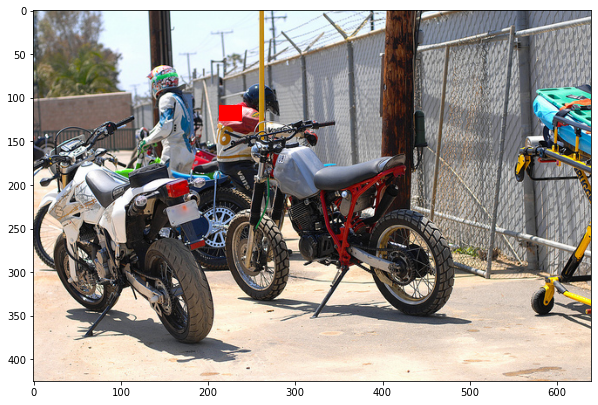

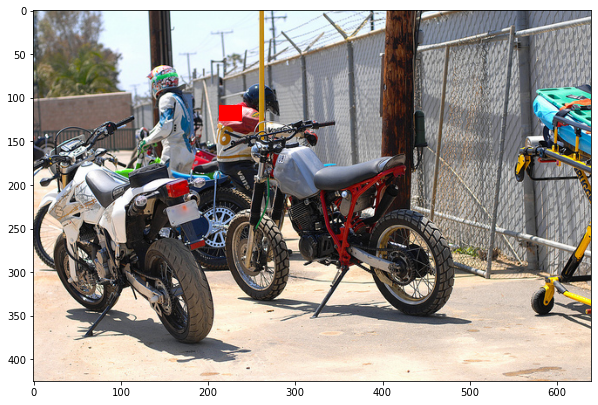

KeyError: 0

In [47]:
for img in list(df_final['image_id'].values)[:5]:
    plt_img_bbox(img)

In [ ]:
plt_img_bbox(test_id)

In [ ]:
I = io.imread(get_path(test_id))
plt.imshow(I)

In [ ]:
len(df_final)

In [57]:
??BBoxBlock()

Type:            TransformBlock
String form:     <fastai.data.block.TransformBlock object at 0x7ff8d60f3100>
File:            ~/anaconda3/lib/python3.8/site-packages/fastai/data/block.py
Source:         
class TransformBlock():
    "A basic wrapper that links defaults transforms for the data block API"
    def __init__(self, type_tfms=None, item_tfms=None, batch_tfms=None, dl_type=None, dls_kwargs=None):
        self.type_tfms  =            L(type_tfms)
        self.item_tfms  = ToTensor + L(item_tfms)
        self.batch_tfms =            L(batch_tfms)
        self.dl_type,self.dls_kwargs = dl_type,({} if dls_kwargs is None else dls_kwargs)
Class docstring: A basic wrapper that links defaults transforms for the data block API


In [48]:
df_final['height'].max()

640

In [49]:
df_final['is_valid'] = False
df_final.loc[df_final.set == 'val', 'is_valid'] = True

In [50]:
df_final.head()

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   

             class  is_valid  
0  machine printed     False  
1  machine printed     False  
2  machine printed     False  
3  machine printed     False  
4  machine printed     False

In [51]:
df_final.is_valid.value_counts()

False    118312
True      27550
Name: is_valid, dtype: int64

In [52]:
img_dir

PosixPath('/home/fredrikmathisen/Documents/data/coco/images/train2014')

In [53]:
df_new = df_final.copy()
df_new = df_new[:300].reset_index(drop=True)

In [54]:
df_new.is_valid.value_counts()

False    247
True      53
Name: is_valid, dtype: int64

In [55]:
df_new['class'].value_counts()

machine printed    267
others              32
handwritten          1
Name: class, dtype: int64

In [161]:
dblock = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('file_name', pref=(str(img_dir)+'/')),
                   get_y=[ColReader('bbox'), ColReader('class')],
                   item_tfms = Resize(256),
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)],
                   n_inp=1)

In [162]:
dls = dblock.dataloaders(df_new, bs=16)

Could not do one pass in your dataloader, there is something wrong in it


In [163]:
dblock.summary(df_new)

Setting-up type transforms pipelines
0      640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1      640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
..     ...                              ...    ...     ...     ...       ...   
295    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
296    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
297    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
298    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
299    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   

                                                                                 b

IndexError: The shape of the mask [1] at index 0 does not match the shape of the indexed tensor [15] at index 0

In [160]:
dls.show_batch()

IndexError: The shape of the mask [1] at index 0 does not match the shape of the indexed tensor [15] at index 0

In [59]:
df_final.set.value_counts()

train    118312
val       27550
Name: set, dtype: int64

In [60]:
df_final['is_valid'] = False
df_final.loc[df_final.set == 'val', 'is_valid'] = True

In [86]:
learner = cnn_learner(dls, xresnet34, loss_func=MSELossFlat()).to_fp16()

In [87]:
learner.lr_find()

AttributeError: 'list' object has no attribute 'transpose'